In [2]:
# load packages
import numpy as np
import xarray as xr
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import scipy.stats as st
from matplotlib import pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import pickle
mpl.rc('font',size=12,weight='bold') #set default font size and weight for plots
import warnings
warnings.filterwarnings("ignore")
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy.linalg as linalg
from xarray import DataArray
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# 1: Creating a DataSet of Lag1

In [3]:
# Loading LATITUDE and LONGITUDE from one sample model

t_max_sample = xr.open_dataset("/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_ACCESS1-0_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc")

lat = t_max_sample.lat.data
lon = t_max_sample.lon.data


In [23]:
multimodel = ["/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_ACCESS1-0_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc",
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_bcc-csm1-1_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc", 
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_bcc-csm1-1-m_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc", 
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_BNU-ESM_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc", 
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_CanESM2_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc", 
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_CCSM4_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc",
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_CESM1-CAM5_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc",
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_CNRM-CM5_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc",
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_CSIRO-Mk3-6-0_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc",
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_GFDL-CM3_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc",
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_GFDL-ESM2G_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc",
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_GFDL-ESM2M_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc",
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_HadGEM2-AO_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc",
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_HadGEM2-CC_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc",
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_inmcm4_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc",
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_IPSL-CM5A-LR_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc",
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_IPSL-CM5A-MR_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc",
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_MIROC5_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc",
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_MIROC-ESM-CHEM_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc",
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_MIROC-ESM_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc",
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_MPI-ESM-LR_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc",
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_MPI-ESM-MR_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc",
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_MRI-CGCM3_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc", 
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_NorESM1-ME_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc", 
              "/Users/guillaumebaggio/EES1115/tasmax_day_BCCAQv2_ANUSPLIN300_NorESM1-M_historical_rcp85_r1i1p1_19500101-20101231.nc.1month.nc"]

multimodel_name = ["ACCESS1-0","bcc-csm1-1","bcc-csm1-1-m","BNU-ESM","CanESM2","CCSM4","CESM1-CAM5",
                  "CNRM-CM5","CSIRO-Mk3-6-0","GFDL-CM3","GFDL-ESM2G","GFDL-ESM2M","HadGEM2-AO",
                   "HadGEM2-CC","inmcm4","IPSL-CM5A-LR","IPSL-CM5A-MR","MIROC5","MIROC-ESM-CHEM",
                   "MIROC-ESM","MPI-ESM-LR","MPI-ESM-MR","MRI-CGCM3","NorESM1-ME","NorESM1-M"]


In [24]:
##### HERE IS THE FUCKING FUNCTION

def lag1_numpy(a_temp):
    ecorr = np.correlate((a_temp-np.mean(a_temp))/np.std(a_temp),(a_temp-np.mean(a_temp))
                         /np.std(a_temp),'same')/len(a_temp)
    lag1_numpy = ecorr[int(len(ecorr)/2)+1]
    
    return lag1_numpy

def lag1_xarrray(a_temp,dim="time"):
    lag1_xarrray = xr.apply_ufunc(lag1_numpy,a_temp,
                     input_core_dims=[[dim]],
                     #output_dtypes=[a_temp.dtype],
                     #exclude_dims=set(("time",)),  
                     vectorize=True)
                     #dask='parallelized')
    return lag1_xarrray

# def magnitude(a, b):
#     func = lambda x, y: np.sqrt(x ** 2 + y ** 2)
#     return xr.apply_ufunc(func, a, b)

In [1]:
#### Create an xarray with a new dimension MODEL and calculate lag1 for each model
#### This code is right 

t_lag1_multimodel=[]

for file_name in multimodel:
        tm = xr.open_dataset(file_name)
        #calculate
        t_lag1 = lag1_xarrray(tm['tasmax'])
        #append
        t_lag1_multimodel.append(t_lag1)
        
t_mlm = xr.concat(t_lag1_multimodel,pd.Index(range(25),name='model'))

t_mlm

SyntaxError: invalid syntax (<ipython-input-1-e5d6bbbbb86d>, line 1)

In [28]:
t_ensemble = xr.Dataset(
    data_vars={
        "lag1": (("model","lat", "lon"), t_mlm.data),
    },
    coords={
        "model": range(25),
        "lat": lat,
        "lon": lon,
    },
    attrs = dict(
        variable="Daily Near-Surface Maximum Air Temperature",
        description="CMIP5 Models Data",
        units="degC"))

In [34]:
t_ensemble

<xarray.Dataset>
Dimensions:  (model: 25, lat: 510, lon: 1068)
Coordinates:
  * model    (model) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23 24
  * lat      (lat) float64 41.04 41.12 41.21 41.29 ... 83.21 83.29 83.37 83.46
  * lon      (lon) float64 -141.0 -140.9 -140.8 -140.7 ... -52.21 -52.13 -52.04
Data variables:
    lag1     (model, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    variable:     Daily Near-Surface Maximum Air Temperature
    description:  CMIP5 Models Data
    units:        degC

In [38]:
t_ensemble.to_netcdf(path="/Users/guillaumebaggio/EES1115/lag1.nc", mode='w')

In [39]:
lag1 = xr.open_dataset("/Users/guillaumebaggio/EES1115/lag1.nc")
lag1

<xarray.Dataset>
Dimensions:  (model: 25, lat: 510, lon: 1068)
Coordinates:
  * model    (model) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23 24
  * lat      (lat) float64 41.04 41.12 41.21 41.29 ... 83.21 83.29 83.37 83.46
  * lon      (lon) float64 -141.0 -140.9 -140.8 -140.7 ... -52.21 -52.13 -52.04
Data variables:
    lag1     (model, lat, lon) float32 ...
Attributes:
    variable:     Daily Near-Surface Maximum Air Temperature
    description:  CMIP5 Models Data
    units:        degC

# 2: Plotting Lag1

Text(0.5, 1.0, 'Multi-Model Ensemble Max. Temperature Lag 1 - January, 1950')

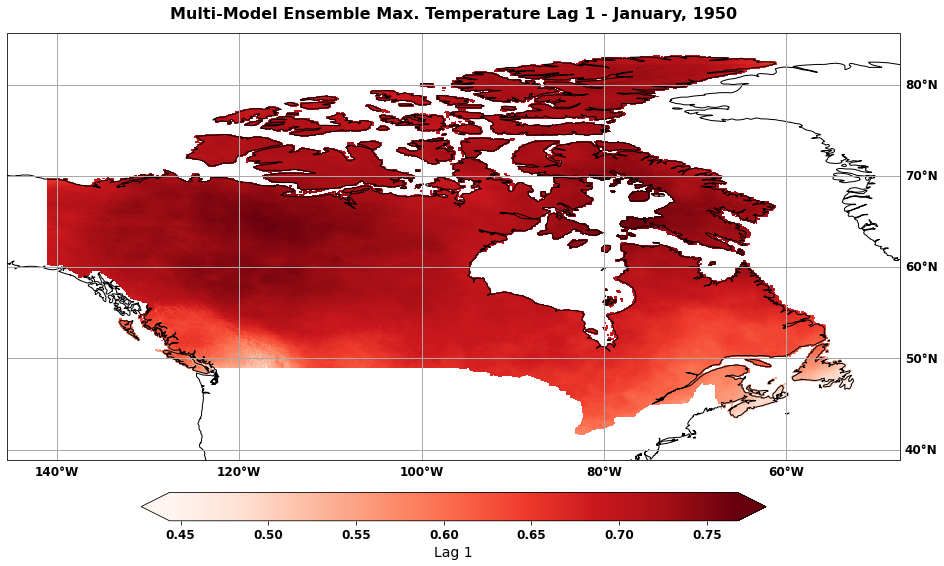

In [32]:
fig = plt.figure(figsize=(16,12))
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_global()
ax.coastlines()
ax.gridlines(linewidth=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=1, color='darkgrey')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'black', 'weight': 'bold'}

# uncomment and complete the line below (see the NAO notebook for a reminder)
pc = ax.pcolormesh(t_ensemble.lon,t_ensemble.lat,t_ensemble['lag1'].mean('model'),cmap="Reds")
cax,kw = mpl.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
out=fig.colorbar(pc,cax=cax,extend='both',**kw)
out.set_label('Lag 1',size=14)
ax.set_title('Multi-Model Ensemble Max. Temperature Lag 1 - January, 1950', 
             pad = 15,fontweight='bold',size=16)

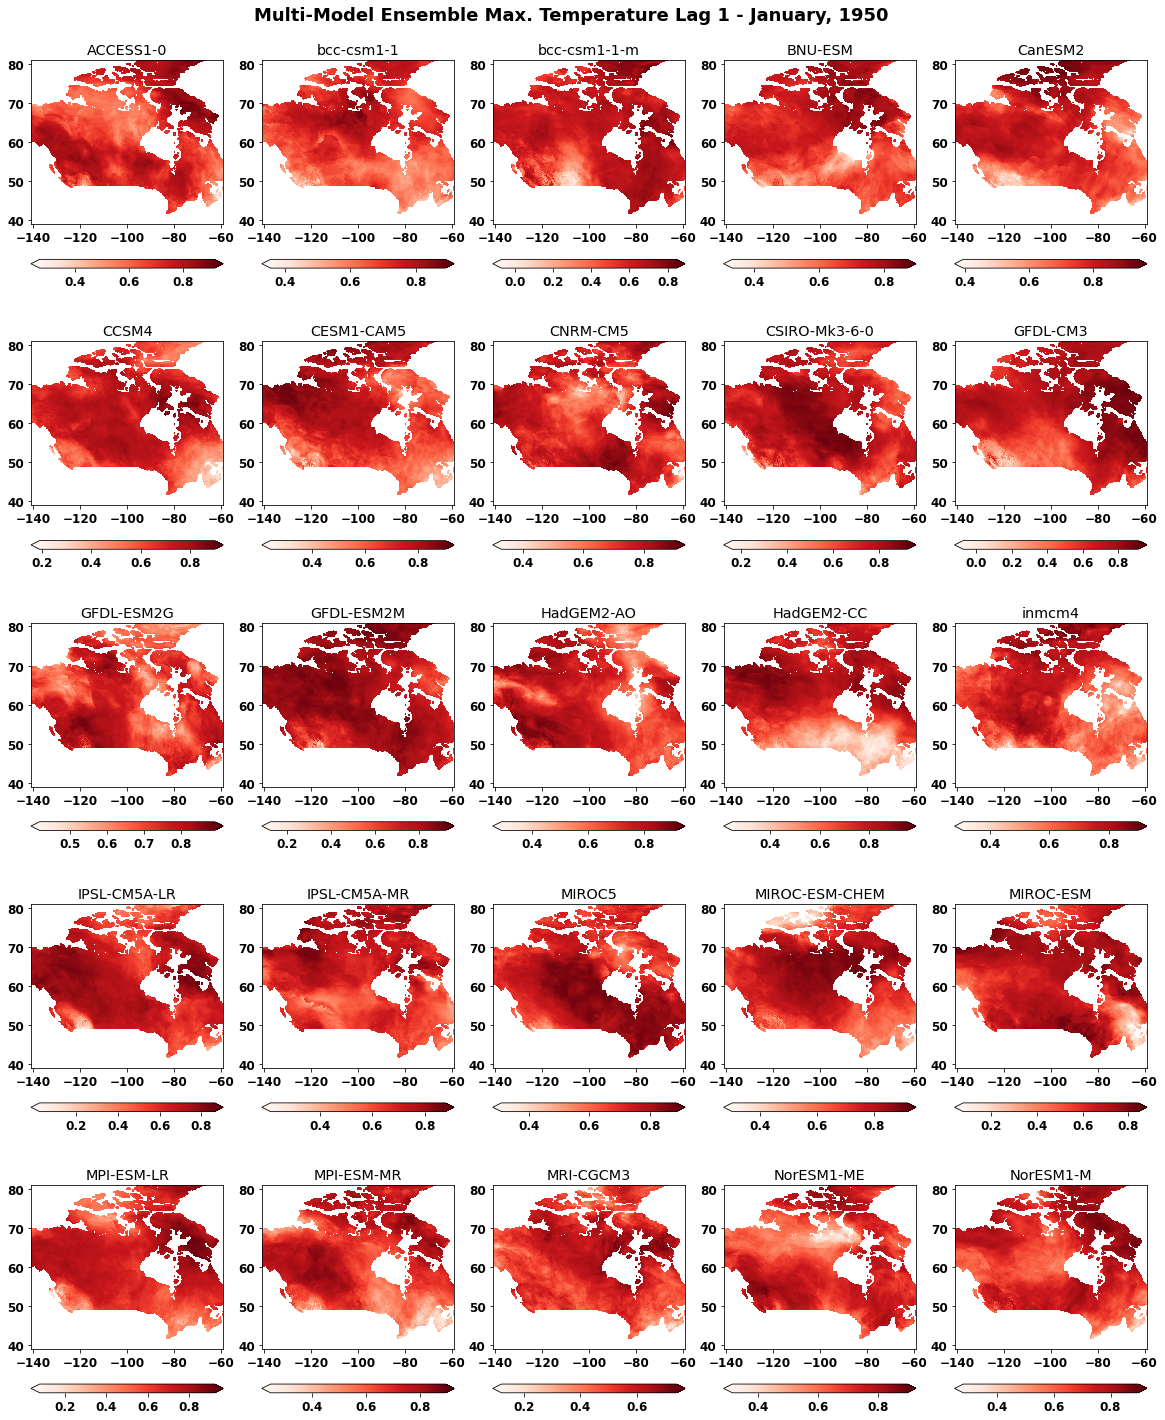

In [33]:
fig, axs = plt.subplots(5,5, figsize=(20, 25), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .2, wspace= .2)

axs = axs.ravel()

for i in range(len(t_ensemble['model'])):

    pc = axs[i].pcolormesh(t_ensemble.lon,t_ensemble.lat,t_ensemble['lag1'][i,:,:],cmap="Reds")
    axs[i].set_title(multimodel_name[i])
    axs[i].set_ylim([39,81])
    axs[i].set_xlim([-141,-59])
    axs[i].set_yticks([40,50,60,70,80])
    axs[i].set_xticks([-140,-120,-100,-80,-60])
    cax,kw = mpl.colorbar.make_axes(axs[i],location='bottom')#,pad=0.05,shrink=0.7)
    out=fig.colorbar(pc,cax=cax,extend='both',**kw)    #axs[i].axis("tight")

fig.suptitle('Multi-Model Ensemble Max. Temperature Lag 1 - January, 1950',
             x=0.5,y=0.91,fontsize=18,fontweight="bold")

#fig.tight_layout()
plt.show()